In [5]:
import argument_based_agent as agent
import llamaAPI as LLM_API
import numpy as np
import seaborn as sns
import copy
import matplotlib.pyplot as plt

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [74]:
N = 15

dialog_stats = np.ndarray(shape=(N, 2, 5))

for ind in range(N):
    results = []
    with open(f'dialog_{ind}.html', 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for i, line in enumerate(lines):
            if "opinion: </span>" in line:
                # Get the next line if it exists
                if i + 1 < len(lines):
                    next_line = lines[i + 1].strip()  # Remove whitespace
                    int_list = [int(x) for x in next_line.strip("[]").split(",")]
                    results.append(int_list)
        dialog_stats[ind] = np.array(results)

In [75]:
print(dialog_stats.shape)

(15, 2, 5)


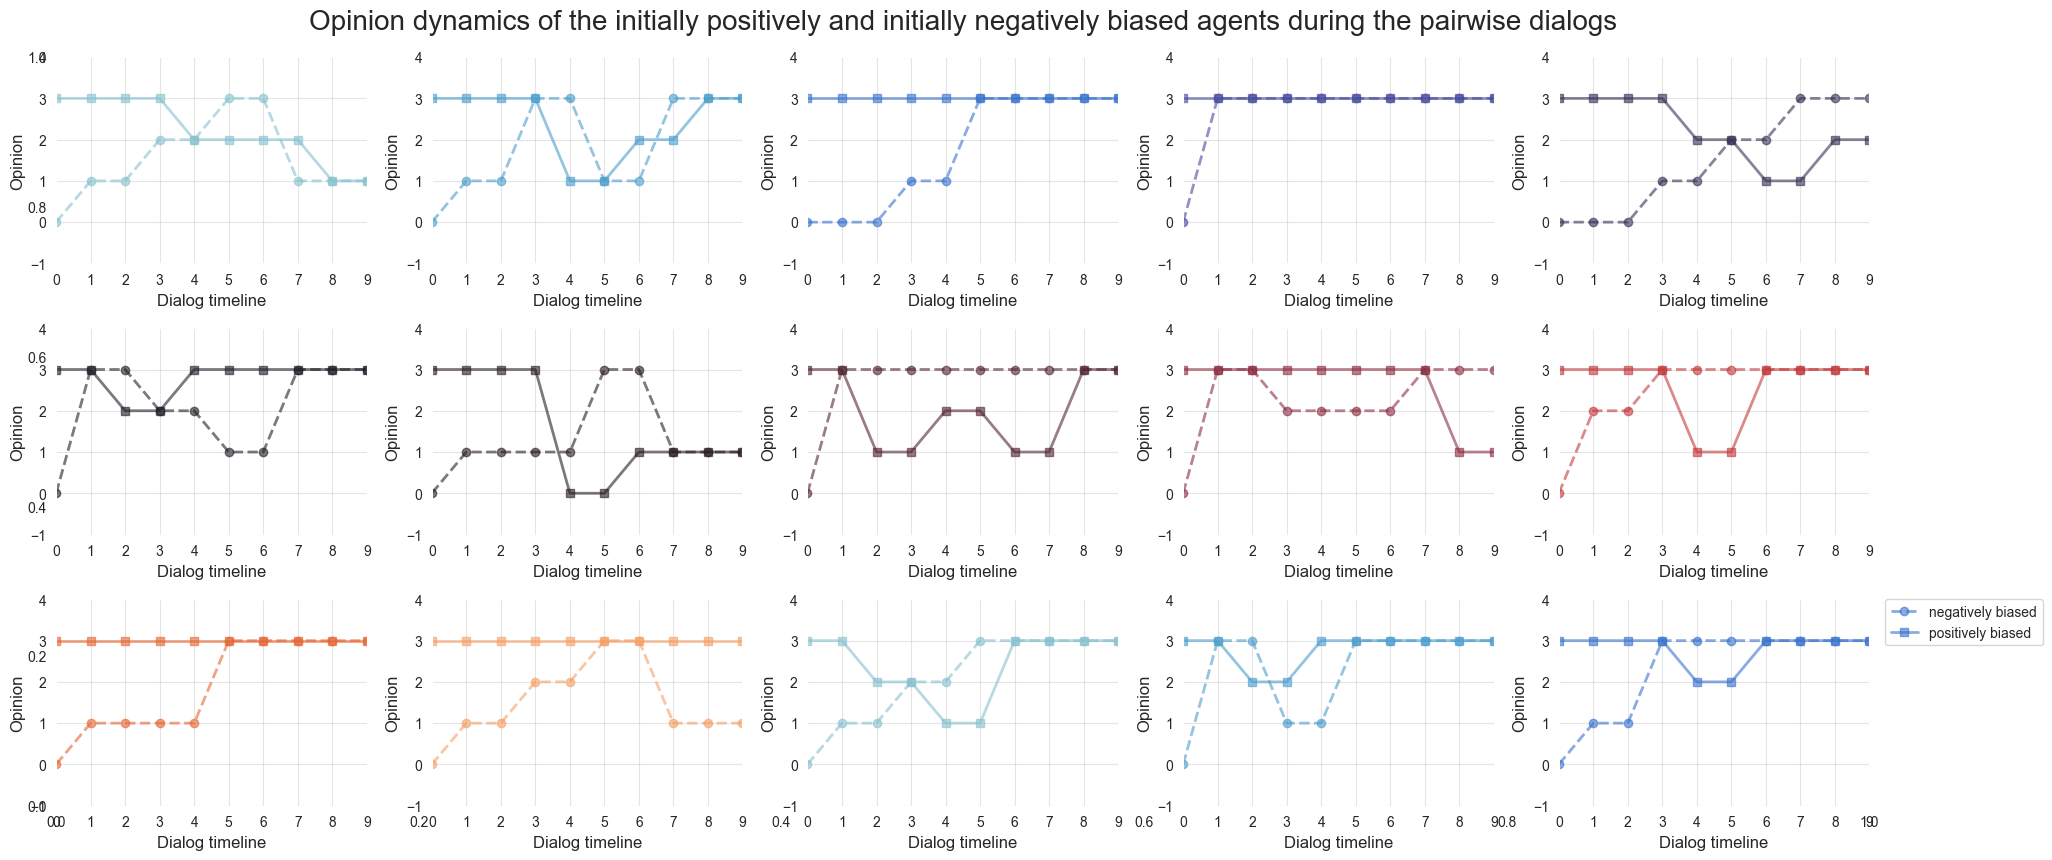

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

# Set style and color palette
sns.set_style("white", {"axes.facecolor": "white", 
                       "axes.edgecolor": "white",
                       "axes.grid": False})
palette = sns.color_palette("icefire", 12)  # Using 12 distinct colors

# Create figure
plt.figure(figsize=(21, 9))
plt.title('Opinion dynamics of the initially positively and initially negatively biased agents during the pairwise dialogs', fontsize=20, pad=20)

# Generate sample data for 12 graphs (6 of each type)
x = np.arange(10)  # x-coordinates from 0 to 4

for i in range(15):
    plt.subplot(3, 5, i+1)

    y = dialog_stats[i, 0, :]
    y = list(chain.from_iterable((val, val) for val in y))
    y = y[1:]
    y.append(y[-1])
    plt.plot(x, y, marker='o', linestyle='--', color=palette[i%12], 
             label=f'negatively biased', linewidth=2, alpha=0.6)

    y = dialog_stats[i, 1, :]
    y = list(chain.from_iterable((val, val) for val in y))
    plt.plot(x, y, marker='s', linestyle='-', color=palette[i%12], 
             label=f'positively biased', linewidth=2, alpha=0.6)
    
    plt.xticks(x)
    plt.grid(alpha=0.5)
    plt.ylim(-1, 4)
    plt.xlim(0, 9)
    plt.xlabel('Dialog timeline', fontsize=12)
    plt.ylabel('Opinion', fontsize=12)

# Customize the plot

# Create legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to prevent legend cutoff
plt.tight_layout()
plt.show()

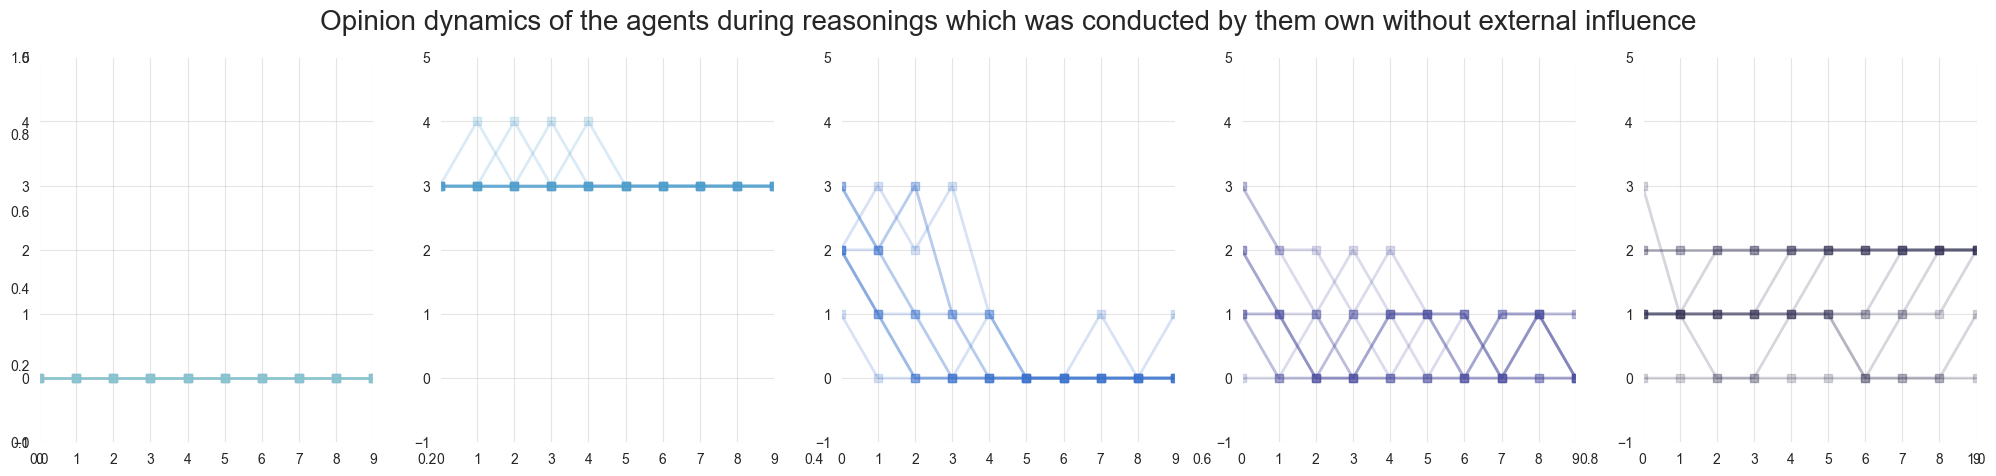

In [119]:
import re

plt.figure(figsize=(25, 5))
plt.title('Opinion dynamics of the agents during reasonings which was conducted by them own without external influence', fontsize=20, pad=20)

for opinion in range(5):
    plt.subplot(1, 5, opinion+1)
    x = np.arange(10)
    for ind in range(10):
        results = []
        with open(f'monologs_{ind}.html', 'r') as file:
            content = file.read()
            matches = re.findall(r"agent-text-(\d)", content)  # Finds digits right after "agent-text-"
            results = [int(match) for match in matches]
        y = results[10+opinion*10:20+opinion*10]
        plt.plot(x, y, marker='s', linestyle='-', color=palette[opinion], 
             label=f'positively biased', linewidth=2, alpha=0.2)
        plt.xticks(x)
        plt.grid(alpha=0.5)
        plt.ylim(-1, 5)
        plt.xlim(0, 9)